In [3]:
###IMPORTS###
import ROOT
# from IPython.display import clear_output
import pandas as pd

Welcome to JupyROOT 6.22/06


In [4]:
###FUNCTIONS###
def validate_uw_hists(tf,file,f_path,f_path_list, binNums,binNumsY, occupancies):  
    #main loop
    for key in tf.GetListOfKeys():    
        input = key.ReadObj()
        
        #determine if the location in the file we are at is a directory
        if issubclass(type(input),ROOT.TDirectoryFile):
           
            #record the path of the directory we are looking in
            try:
                f_path = input.GetPath() 
            except:
                print("cant GetPath")
                

            #split the path by '/' so we can determine where we are in the folder structure        
            try:
                split_path = f_path.split("/")
            except:
                print('cant split_path')            
            
            
            #recursively go deeper into the file structure depending on the length of split_path
#             print(split_path)
            if len(split_path) <= 3:
                #we are 2 directories deep, go deeper
                f_path,f_path_list, binNums,binNumsY, occupancies = validate_uw_hists(input,file,f_path, f_path_list, binNums,binNumsY, occupancies)  
            elif len(split_path) > 3 and any(folder in split_path for folder in ('CaloMonitoring', 'Jets','MissingEt','Tau','egamma')):                
                #we are greater than 3 directories deep and these directories include the specified folders above, goo deeper
                f_path, f_path_list, binNums,binNumsY, occupancies = validate_uw_hists(input,file,f_path, f_path_list, binNums,binNumsY, occupancies)     
            else:
                pass
            
            #record the file_path that will result now that we are done with the current folder level
            #i.e. the folder path that results from going up a level in the directory
            f_path = f_path.split('/')
            f_path = '/'.join(f_path[:-1])
                
        elif issubclass(type(input), ROOT.TProfile):
            #record the path of the directory we are looking in with the name of the hist file as part of the path
            try:
                f_path_tp = f_path + '/' + input.GetName()                
            except:
                print("cant GetPath3")
            
            #get the part of f_path that follows the ':'
            f_path_tp = f_path_tp.split(':')
            f_path_tp = f_path_tp[1][1:]
            
            
            hist_file = file.Get(f_path_tp)
            binsX = hist_file.GetNbinsX()                                    
            
            #setup the 3 arrays for creating the dataframe
            for binX in range(binsX+1):
                f_path_list.append(f_path_tp)
                binNum = hist_file.GetBin(binX)
                binNums.append(binX)
                binNumsY.append(None)
                occupancies.append(hist_file.GetBinContent(binNum))                        
            
        elif issubclass(type(input),ROOT.TH2):

            #record the path of the directory we are looking in with the name of the hist file as part of the path
            try:
                f_path_th2 = f_path + '/' + input.GetName()                
            except:
                print("cant GetPath3")
            
            #get the part of f_path that follows the ':'
            f_path_th2 = f_path_th2.split(':')
            f_path_th2 = f_path_th2[1][1:]
            
            
            hist_file = file.Get(f_path_th2)
            binsX = hist_file.GetNbinsX()                        
            binsY = hist_file.GetNbinsY()
            
            #setup the 3 arrays for creating the dataframe
            for binX in range(binsX+1):
                for binY in range(binsY+1):
                    f_path_list.append(f_path_th2)
                    binNumXY = hist_file.GetBin(binX,binY)
                    binNums.append(binX)
                    binNumsY.append(binY)
                    occupancies.append(hist_file.GetBinContent(binNumXY))            
                
        elif issubclass(type(input),ROOT.TH1):
            
            #record the path of the directory we are looking in with the name of the hist file as part of the path
            try:
                f_path_th1 = f_path + '/' + input.GetName()                
            except:
                print("cant GetPath2")

            #get the part of f_path that follows the ':'
            f_path_th1 = f_path_th1.split(':')
            f_path_th1 = f_path_th1[1][1:]
            
            
            hist_file = file.Get(f_path_th1)
            binsX = hist_file.GetNbinsX()            
            
         #setup the 3 arrays for creating the dataframe
            for binX in range(binsX+1):                
                f_path_list.append(f_path_th1)
                binNum = hist_file.GetBin(binX,0)                
                binNums.append(binNum)
                binNumsY.append(None)                
                occupancies.append(hist_file.GetBinContent(binNum))
    
    return f_path, f_path_list, binNums,binNumsY, occupancies

In [5]:
file = ROOT.TFile.Open('../data15_13TeV.00276689.physics_Main.merge.HIST.f1051_h335._0001.1')
f_path,f_path_list, binNums,binNumsY, occupancies = validate_uw_hists(file,file,'',[],[],[],[])
df = pd.DataFrame({'paths':f_path_list,'x':binNums,'y':binNumsY,'occ':occupancies})
df

,paths,x,y,occ
0,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,0,NaN,0.000000
1,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,1,NaN,103.209421
2,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,2,NaN,222.125207
3,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,3,NaN,253.652408
4,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,4,NaN,213.533309
5,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,5,NaN,191.670239
6,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,6,NaN,201.822681
7,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,7,NaN,235.068629
8,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,8,NaN,242.129588
9,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,9,NaN,178.028956


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df[df['paths'] == df['paths'].unique()[0]].head()

,paths,x,y,occ
0,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,0,NaN,0.000000
1,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,1,NaN,103.209421
2,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,2,NaN,222.125207
3,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,3,NaN,253.652408
4,run_276689/CaloMonitoring/ClusterMon/CaloCalTo...,4,NaN,213.533309


In [19]:
df[df['paths'] == df['paths'].unique()[0]].shape

(99, 4)

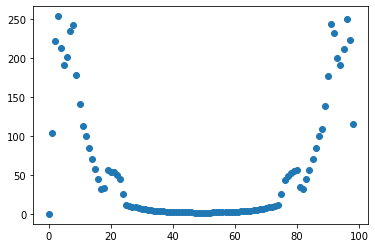

In [10]:
plt.scatter(df[df['paths'] == df['paths'].unique()[0]]['x'].values,df[df['paths'] == df['paths'].unique()[0]]['occ'].values)
plt.grid()

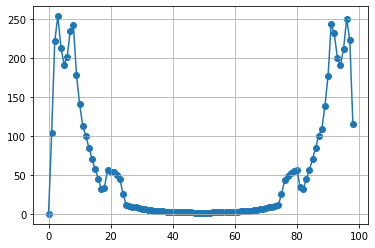

In [5]:
plt.plot(df[df['paths'] == df['paths'].unique()[0]]['x'].values,df[df['paths'] == df['paths'].unique()[0]]['occ'].values)
plt.scatter(df[df['paths'] == df['paths'].unique()[0]]['x'].values,df[df['paths'] == df['paths'].unique()[0]]['occ'].values)
plt.grid()

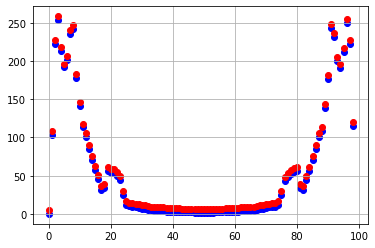

In [9]:
plt.scatter(df[df['paths'] == df['paths'].unique()[0]]['x'].values,df[df['paths'] == df['paths'].unique()[0]]['occ'].values,c='b')
plt.scatter(df[df['paths'] == df['paths'].unique()[0]]['x'].values,df[df['paths'] == df['paths'].unique()[0]]['occ'].values+5,c='r')
plt.grid()

# QUESTIONS:
- does every hist file of the same stream, ftag, etc have the same number of X/Y bins per specific histogram as every other hist file?

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543754 entries, 0 to 8543753
Data columns (total 4 columns):
paths    object
x        int64
y        float64
occ      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 260.7+ MB


In [ ]:
#wait...so we would have to...in order to train for individual histograms...go through the entire folder of hundreds
#if not thousands of files and store these in an array/dataframe to train a ML algorithm.
#theres 3000+ files meaning we would have to train 3000+ ML algorithms?

#the big question here: is there a difference in the distribution of certain groups of files?
#this way we dont have to do hat many ML algorithms and can train with mroe data